In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hosts_iguais = True
if hosts_iguais:
    sufixo = '_iguais'
else:
    sufixo = '_diferentes'
df = pd.read_table ("resultados80"+sufixo+".txt", sep='\s+', index_col = [1, 0])

In [3]:
df

TxpacSlice1  RxpacSlice1  dropSlice1  TxpacSlice2  RxpacSlice2  \
RNG numHosts                                                                   
1   50-50         4524910      4524781         129      2776748      2766095   
    100-100       9738844      9733559        5285      2967143      2941820   
    200-200      11429909     11404849       25060      2991879      2943088   
    300-300      11719762     11669650       50112      3014153      2945446   
    400-400      11826630     11753495       73135      3032453      2945348   
    500-500      11836226     11738154       98072      3070825      2953710   
    600-600      11891118     11776711      114407      3093413      2954185   
2   50-50         4929673      4929476         197      2849146      2838346   
    100-100       9376935      9372807        4128      2934004      2910217   
    200-200      11403226     11377549       25677      2992073      2943154   
    300-300      11662151     11613706       48445      3010829      2944278   
    400-400      11813601     11743578       70023      3033303      2948566   
    500-500      11868282     11772587       95695      3065423      2949352   
    600-600      11890658     11774763      115895      3099093      2956770   
3   50-50         4878156      4878117          39      2770264      2760073   
    100-100       8835331      8832939        2392      2965315      2941602   
    200-200      11121946     11097861       24085      2994744      2945215   
    300-300      11634555     11583269       51286      3013806      2945601   
    400-400      11793085     11717117       75968      3036296      2947396   
    500-500      11862314     11766352       95962      3061335      2951667   
    600-600      11892309     11771136      121173      3085307      2952225   
4   50-50         5047783      5047760          23      2733000      2722024   
    100-100       9294706      9292203        2503      2964553      2938661   
    200-200      11313161     11285238       27923      2991405      2944916   
    300-300      11793932     11743364       50568      3015553      2946979   
    400-400      11846895     11773332       73563      3041952      2951399   
    500-500      11866267     11766833       99434      3061312      2951402   
    600-600      11886918     11768647      118271      3097020      2952872   

              dropSlice2  
RNG numHosts              
1   50-50          10653  
    100-100        25323  
    200-200        48791  
    300-300        68707  
    400-400        87105  
    500-500       117115  
    600-600       139228  
2   50-50          10800  
    100-100        23787  
    200-200        48919  
    300-300        66551  
    400-400        84737  
    500-500       116071  
    600-600       142323  
3   50-50          10191  
    100-100        23713  
    200-200        49529  
    300-300        68205  
    400-400        88900  
    500-500       109668  
    600-600       133082  
4   50-50          10976  
    100-100        25892  
    200-200        46489  
    300-300        68574  
    400-400        90553  
    500-500       109910  
    600-600       144148

In [4]:
df["%dropTotalS1"] = df.apply (lambda row: 100 * (float)(row["dropSlice1"]) / (row["TxpacSlice1"]+row["TxpacSlice2"]), axis=1)
df["%dropTotalS2"] = df.apply (lambda row: 100 * (float)(row["dropSlice2"]) / (row["TxpacSlice1"]+row["TxpacSlice2"]), axis=1)
#df
df["%dropS1"] = df.apply (lambda row: 100 * (float)(row["dropSlice1"]) / (row["TxpacSlice1"]), axis=1)
df["%dropS2"] = df.apply (lambda row: 100 * (float)(row["dropSlice2"]) / (row["TxpacSlice2"]), axis=1)

In [5]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

In [6]:
if hosts_iguais:
    df = df.query("numHosts != '50-50'")
else:
    df = df.query("numHosts != '33-67'" and "numHosts != '67-33'")
gpb = df.groupby (["numHosts"])

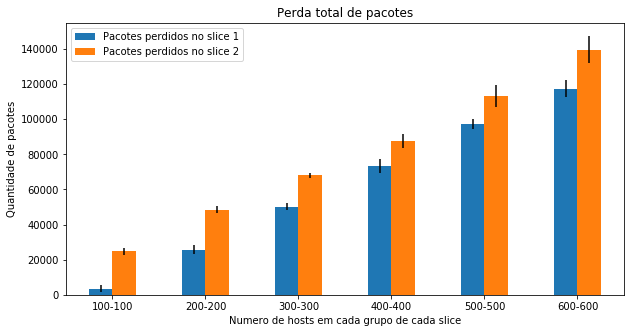

In [7]:
media = gpb.mean()
err = gpb.aggregate(confinterval)
err = err.filter(items=['dropSlice1', 'dropSlice2'])
media = media.filter(items=['dropSlice1', 'dropSlice2'])
#display (media)
#display (err)

media.plot (kind='bar', yerr=err, title="Perda total de pacotes", rot=360, figsize=(10,5))
plt.xlabel('Numero de hosts em cada grupo de cada slice')
plt.ylabel('Quantidade de pacotes')
plt.gca().legend(('Pacotes perdidos no slice 1','Pacotes perdidos no slice 2'))
plt.savefig('grafico_hosts'+sufixo+'.pdf')

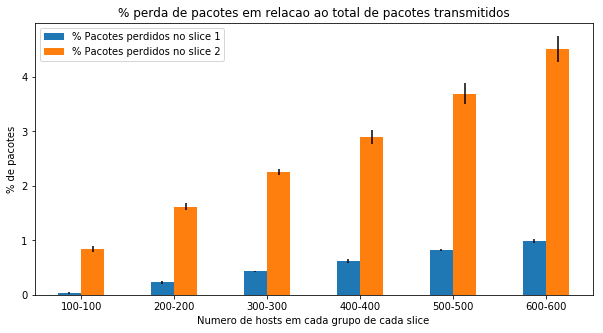

In [8]:
err = gpb.aggregate(confinterval)
media = gpb.mean()
err = err.filter(items=['%dropS1', '%dropS2'])
media = media.filter(items=['%dropS1', '%dropS2'])

media.plot (kind='bar', yerr=err, title="% perda de pacotes em relacao ao total de pacotes transmitidos", rot=360, figsize=(10,5))
plt.xlabel('Numero de hosts em cada grupo de cada slice')
plt.ylabel('% de pacotes')
plt.gca().legend(('% Pacotes perdidos no slice 1','% Pacotes perdidos no slice 2'))
plt.savefig('grafico_hosts'+sufixo+'_porcentagem.pdf')

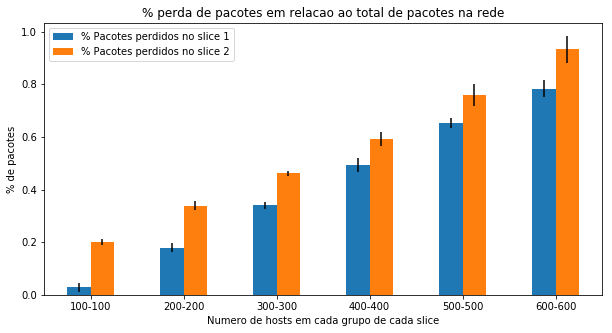

In [9]:
#Grafico em relação ao total
err = gpb.aggregate(confinterval)
media = gpb.mean()
err = err.filter(items=['%dropTotalS1', '%dropTotalS2'])
media = media.filter(items=['%dropTotalS1', '%dropTotalS2'])

media.plot (kind='bar', yerr=err, title="% perda de pacotes em relacao ao total de pacotes na rede", rot=360, figsize=(10,5))
plt.xlabel('Numero de hosts em cada grupo de cada slice')
plt.ylabel('% de pacotes')
plt.gca().legend(('% Pacotes perdidos no slice 1','% Pacotes perdidos no slice 2'))
#plt.savefig('grafico_hosts'+sufixo+'_porcentagemTotal.pdf')

In [10]:
#Graficos para cada RNG

#lista_rng = ['1', '2','3','4']
#for i in lista_rng:
#    g=df[df.index.get_level_values('RNG').isin([i])].filter(items=['dropSlice1', 'dropSlice2'])
#    g.plot.bar(figsize=(20,10),title="Perda de pacotes, RNG = " + i, logy=True)

In [11]:
#Graficos para cada numero de host

#lista_host = ['100-100','200-200','300-300','400-400','500-500','600-600']
#for i in lista_host:
#    g=df[df.index.get_level_values('numHosts').isin([i])].filter(items=['dropSlice1', 'dropSlice2'])
#    g.plot.bar(figsize=(20,10),title="Perda de pacotes, hosts = " + i)